## Used Bikes-Feature Engineering and EDA

**Problem Statement is to predict Sales of Used Bikes .So our Target Variable will be Sales which is a Continuous Data
These means its a Regression problem**

## DataScience LIfeCycle has following components:
   1. Data source:Here we read the data and paas to next component
   2. Data Ingestion: Here we do train and test split and paas  to next component
   3. Data Tranformation: Here we do EDA and Feature Engineering and paas to next component
   4. ModelTrainer:Multiple models will get applied
   5. ModelEvaluation: Each model will get evaluated and we will select model with best accuracy
   6. Model Deployment:Here we use pipelines 

### Importing libraries

In [4]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataclasses import dataclass
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
Bikes_Sales_Data=pd.read_csv('Bikes.csv')
Bikes_Sales_Data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


### Data source:Here we read the data and paas to next component
**Our Data source is bikes.csv**

### Data Ingestion: Here we do train and test split and paas to next component

In [6]:
Bikes_Sales_Data_train, Bikes_Sales_Data_test = train_test_split(Bikes_Sales_Data, test_size=0.30, shuffle=False)
Bikes_Sales_Data_train.to_csv('train.csv')
Bikes_Sales_Data_test.to_csv('test.csv')
Bikes_Sales_Data.to_csv('raw.csv')

### Train Data

In [7]:
Bikes_Sales_Data_train

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
...,...,...,...,...,...,...,...,...
5494,Royal Enfield Thunderbird 350cc 2015,2015,10000 Km,first owner,kolkata,\n\n 40 kmpl,19.80 bhp,106000
5495,Bajaj Pulsar 150cc 2014,2014,Mileage 65 Kmpl,first owner,hyderabad,\n\n 65 Kmpl,14.85 bhp,52000
5496,Bajaj Pulsar RS200 ABS 2018,2018,Mileage 35 Kmpl,first owner,hyderabad,\n\n 35 Kmpl,24.50 bhp,110000
5497,Hero Splendor Plus i3s 2019,2019,6500 Km,first owner,nashik,\n\n 81 kmpl,8.20 bhp,75000


## Test Data

In [8]:
Bikes_Sales_Data_test

,model_name,model_year,kms_driven,owner,location,mileage,power,price
5499,Honda CB Unicorn 150cc 2013,2013,Mileage 60 Kmpl,first owner,pune,\n\n 60 Kmpl,14 bhp,55000
5500,Yamaha FZs 150cc 2014,2014,65000 Km,first owner,nadiad,\n\n 45 kmpl,13 bhp,31200
5501,Yamaha FZ16 150cc 2009,2009,Mileage 58 Kmpl,fourth owner or more,kochi,\n\n 58 Kmpl,13 bhp,17000
5502,Bajaj Dominar 400 ABS BS6 2020,2020,Mileage 28 Kms,first owner,pune,\n\n 28 Kms,39.42 bhp,200000
5503,TVS Sport KS Spoke 2018,2018,8000 Km,first owner,delhi,\n\n 95 kmpl,7.40 bhp,30000
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000


## Exploratory Data Analysis (EDA)

## Top 5 rows

In [9]:
Bikes_Sales_Data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


## Shape of Data

In [10]:
Bikes_Sales_Data.shape

(7857, 8)

## Data Checks

1. **Check missing Values**

In [11]:
Bikes_Sales_Data.isna().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

2. **Drop missing values**

In [12]:
Bikes_Sales_Data=Bikes_Sales_Data.dropna()

In [13]:
Bikes_Sales_Data.isna().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64

- **Missing values removed**

3. **Check for Duplicates**

In [14]:
Bikes_Sales_Data.duplicated().sum()

0

- **NO Duplicates present**

4. **Stastics about Data**

In [15]:
Bikes_Sales_Data.describe()

,model_year,price
count,7796.000000,7.796000e+03
mean,2015.405849,1.060233e+05
std,3.854537,1.364439e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


5. **Checking Data Types**

In [16]:
Bikes_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7796 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7796 non-null   object
 1   model_year  7796 non-null   int64 
 2   kms_driven  7796 non-null   object
 3   owner       7796 non-null   object
 4   location    7796 non-null   object
 5   mileage     7796 non-null   object
 6   power       7796 non-null   object
 7   price       7796 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 548.2+ KB


- **we have Object and int as datatypes in our dataset**

 **Sorting Data Set by Model_year**

In [19]:
Bikes_Sales_Data.sort_values(by=['model_year'])

,model_name,model_year,kms_driven,owner,location,mileage,power,price
2211,Bajaj Pulsar NS 200cc 2013,1950,Mileage 35 Kmpl,first owner,noida,\n\n 35 Kmpl,23.19 bhp,55000
4258,Bajaj Pulsar NS 200cc 2013,1950,Mileage 35 Kmpl,third owner,khalilabad,\n\n 35 Kmpl,23.19 bhp,55000
3429,Royal Enfield‎ Bullet 350cc 1970,1970,5000 Km,third owner,pune,\n\n 25 kmpl,19.80 bhp,190000
4174,Royal Enfield Standard 350cc 1985,1985,Mileage 40 Kmpl,third owner,kolhapur,\n\n 40 Kmpl,18 bhp,125000
5584,Yazdi Road King 250cc 1986,1986,100000 Km,first owner,lucknow,\n\n,16 BHP at 5000 rpm,60000
...,...,...,...,...,...,...,...,...
2741,Hero Passion Pro 110cc Drum BS6 2021,2021,236 Km,first owner,pune,\n\n,9.02 bhp,80000
709,Royal Enfield Classic 350cc ABS Stealth Black ...,2021,2002 Km,first owner,hyderabad,\n\n 35 kmpl,19.1 bhp,220000
710,Hero Xpulse 200cc BS6 2021,2021,628 Km,first owner,gwalior,\n\n 46.40 kmpl,17.8 bhp,110000
2267,Yamaha MT-15 150cc BS6 2021,2021,3000 Km,first owner,bangalore,\n\n,18.23 bhp,180000


6. **Checking Number of Unique values in each column**

In [20]:
Bikes_Sales_Data.nunique()

model_name    1700
model_year      34
kms_driven    1785
owner            4
location       558
mileage        116
power          262
price         1615
dtype: int64

In [21]:
Bikes_Sales_Data.sort_values(by=['model_year'])

,model_name,model_year,kms_driven,owner,location,mileage,power,price
2211,Bajaj Pulsar NS 200cc 2013,1950,Mileage 35 Kmpl,first owner,noida,\n\n 35 Kmpl,23.19 bhp,55000
4258,Bajaj Pulsar NS 200cc 2013,1950,Mileage 35 Kmpl,third owner,khalilabad,\n\n 35 Kmpl,23.19 bhp,55000
3429,Royal Enfield‎ Bullet 350cc 1970,1970,5000 Km,third owner,pune,\n\n 25 kmpl,19.80 bhp,190000
4174,Royal Enfield Standard 350cc 1985,1985,Mileage 40 Kmpl,third owner,kolhapur,\n\n 40 Kmpl,18 bhp,125000
5584,Yazdi Road King 250cc 1986,1986,100000 Km,first owner,lucknow,\n\n,16 BHP at 5000 rpm,60000
...,...,...,...,...,...,...,...,...
2741,Hero Passion Pro 110cc Drum BS6 2021,2021,236 Km,first owner,pune,\n\n,9.02 bhp,80000
709,Royal Enfield Classic 350cc ABS Stealth Black ...,2021,2002 Km,first owner,hyderabad,\n\n 35 kmpl,19.1 bhp,220000
710,Hero Xpulse 200cc BS6 2021,2021,628 Km,first owner,gwalior,\n\n 46.40 kmpl,17.8 bhp,110000
2267,Yamaha MT-15 150cc BS6 2021,2021,3000 Km,first owner,bangalore,\n\n,18.23 bhp,180000


In [22]:
Bikes_Sales_Data.nunique()

model_name    1700
model_year      34
kms_driven    1785
owner            4
location       558
mileage        116
power          262
price         1615
dtype: int64

7. **Unique values of each column**

In [23]:
print(Bikes_Sales_Data['model_name'].unique())
print(Bikes_Sales_Data['model_year'].unique())
print(Bikes_Sales_Data['kms_driven'].unique())
print(Bikes_Sales_Data['owner'].unique())
print(Bikes_Sales_Data['location'].unique())
print(Bikes_Sales_Data['power'].unique())
print(Bikes_Sales_Data['price'].unique())

['Bajaj Avenger Cruise 220 2017' 'Royal Enfield Classic 350cc 2016'
 'Hyosung GT250R 2012' ... 'Bajaj Discover 125cc 2009'
 'Bajaj Pulsar 200cc 2011' 'Hero CD Deluxe 100cc 2004']
[2017 2016 2012 2020 2018 2014 2019 2015 2011 2009 2021 2013 2008 2010
 2007 2003 2006 1991 1994 1997 1998 2001 1990 2004 2005 2002 2000 1950
 1999 1970 1993 1985 1996 1986]
['17000 Km' '50000 Km' '14795 Km' ... '66780 Km' '16510 Km' '6407 Km']
['first owner' 'third owner' 'second owner' 'fourth owner or more']
['hyderabad' 'pondicherry' 'bangalore' 'jaipur' 'chennai' 'ghaziabad'
 'delhi' 'ludhiana' 'jaunpur' 'mumbai' 'chittorgarh' 'thalassery'
 'bathinda' 'gurgaon' 'dehradun' 'pune' 'kukatpally' 'navi mumbai'
 'lucknow' 'siliguri' 'bengaluru' 'rajkot' 'agra' 'bhiwandi' 'patna'
 'udaipur' 'bihar shariff' 'jalandhar' 'vadodara' 'visakhapatnam'
 'thiruvananthapuram' 'ahmedabad' 'bareilly' 'thane' 'kannur' 'surat'
 'kurukshetra' 'moradabad' 'bhagalpur' 'hooghly' 'jhunjhunu' 'kochi'
 'srikakulam' 'jamshedpur' 'haz

## Insight: 
**Key properties of Data:**
1. Temporality : As per sorted Data we know we have Data from 1950 to 2021
2. Scope: Data Has large scope looking at the data available for a huge range and locations data captured is also has large scope
3. Granularity: Data is finner as details related to even smaller places is available
4. Faithfullness: Data Cleaning is required as data is huge chances of missing values and outliers is more

 8. **Splitting Numerical and categorial feature**

In [25]:
Numerical_features=[feature for feature in Bikes_Sales_Data.columns if Bikes_Sales_Data[feature].dtype!='Object']
Categorial_features=[feature for feature in Bikes_Sales_Data.columns if Bikes_Sales_Data[feature].dtype=='Object']

**Numerical_features**

In [26]:
Numerical_features

['model_name',
 'model_year',
 'kms_driven',
 'owner',
 'location',
 'mileage',
 'power',
 'price']

**Categorial_features**

In [27]:
Categorial_features

[]

**Insight : we don't have any categorical feature**

#### Data Visualizations

**Pairplot**

<Figure size 2000x4000 with 0 Axes>

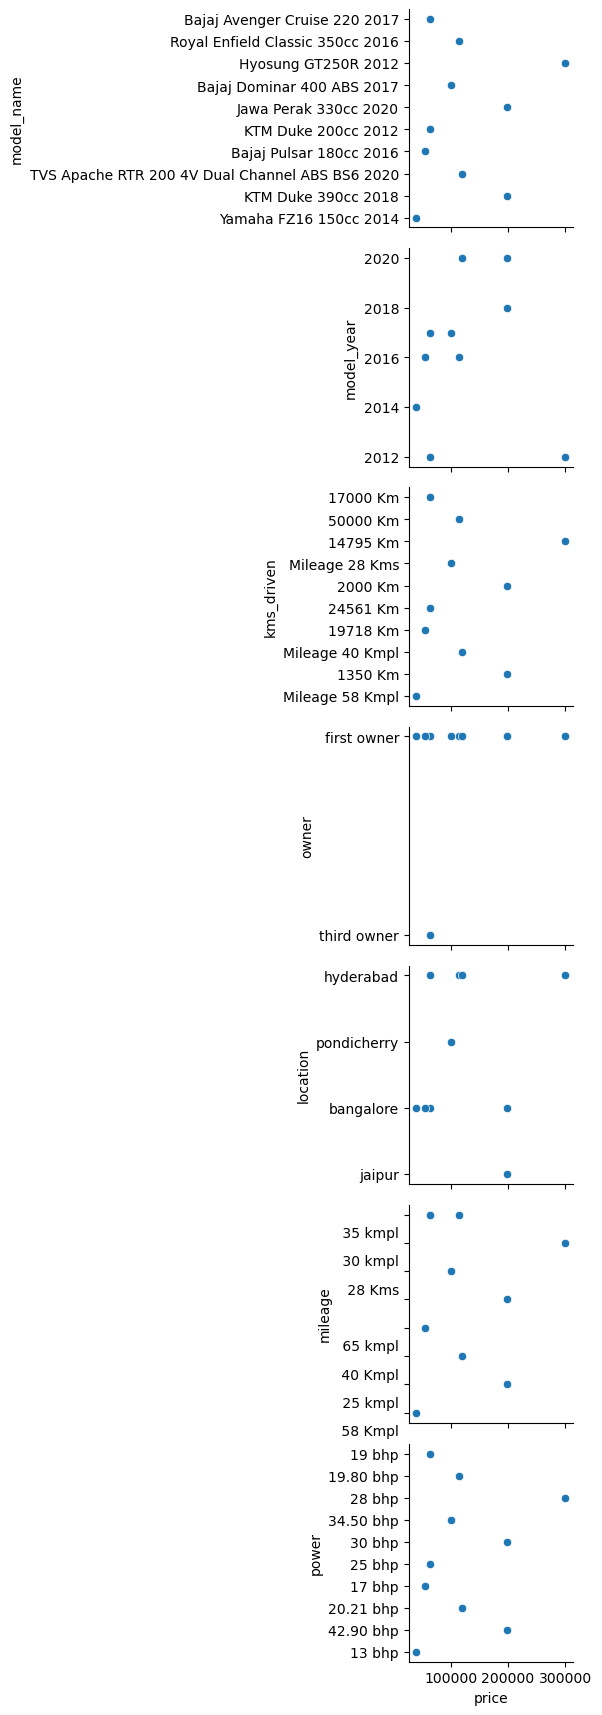

In [50]:
plt.figure(figsize=(20,40))
sns.pairplot(data=Bikes_Sales_Data.head(10),x_vars='price',y_vars=['model_name','model_year','kms_driven','owner','location','mileage','power'])
plt.show()

**Insight**
- I can see linear relationship between features mileage,kms_driven,power,model_year and model_name vs Targetvariable price

1. **Histogram for Bikes model_year**

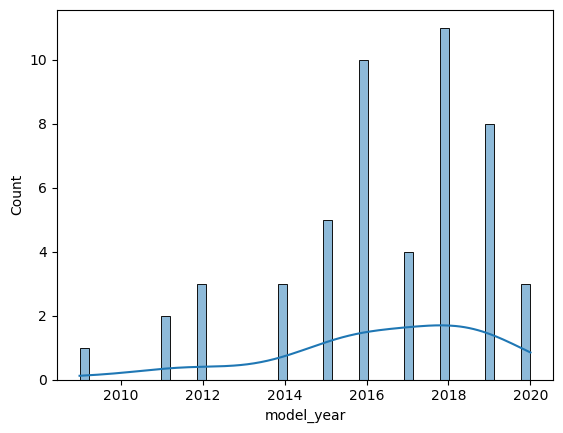

In [28]:
sns.histplot(Bikes_Sales_Data.head(50),bins=50,x='model_year',kde=True)
plt.show()

**Observation:**
- Used Bikes available count is high for model_year 2016 and 2018


### Outlier Check for Target Variable
#### Box Plot

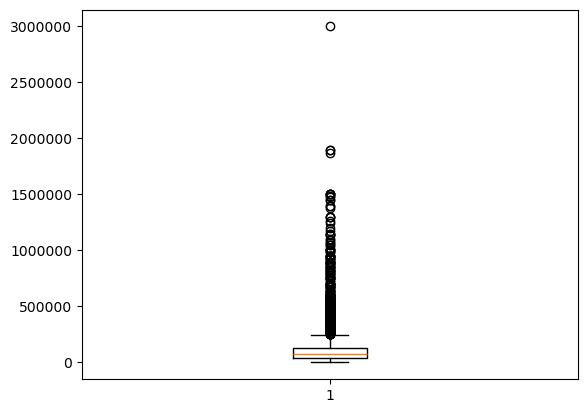

In [56]:
x=Bikes_Sales_Data['price']
plt.ticklabel_format(style='plain')
plt.boxplot(x)
plt.show()

### outliers removed for Target Variable i.e. Price

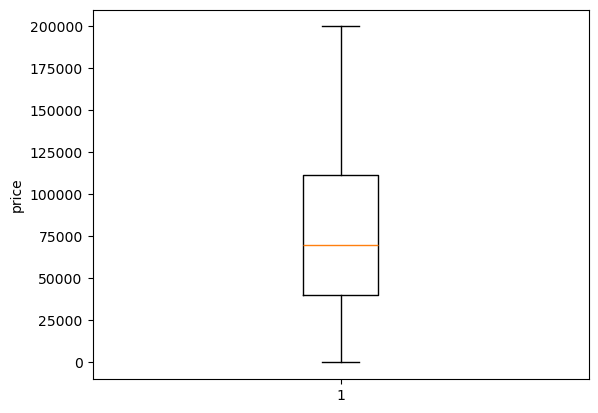

In [58]:
Bikes_Sales_Data=Bikes_Sales_Data[Bikes_Sales_Data['price']<200000]
x=Bikes_Sales_Data['price']
plt.ticklabel_format(style='plain')
plt.boxplot(x)
plt.ylabel('price')
plt.show()

# Univariate Analysis for Price

## Histogram for Target  Variable Price

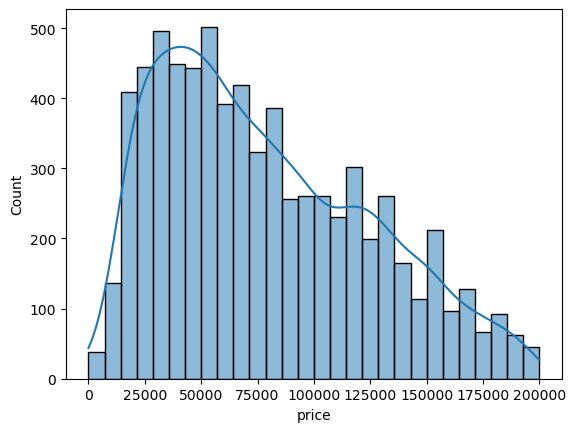

In [60]:
sns.histplot(Bikes_Sales_Data['price'],kde=True)
plt.show()

## Observation
- Used Bikes have good count for price 30,000 to 55,000
- Count drastically decrease  for  high prices bikes say above 80,000 

## Feature Engineering
- Values needs to converted to integer for following columns
- Kms_driven
- power
- mileage


In [61]:
Bikes_Sales_Data.head(50)


,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
5,KTM Duke 200cc 2012,2012,24561 Km,third owner,bangalore,\n\n 35 kmpl,25 bhp,63400
6,Bajaj Pulsar 180cc 2016,2016,19718 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,55000
7,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,Mileage 40 Kmpl,first owner,hyderabad,\n\n 40 Kmpl,20.21 bhp,120000
8,KTM Duke 390cc 2018,2018,1350 Km,first owner,jaipur,\n\n 25 kmpl,42.90 bhp,198000
9,Yamaha FZ16 150cc 2014,2014,Mileage 58 Kmpl,first owner,bangalore,\n\n 58 Kmpl,13 bhp,40000
10,Royal Enfield Classic 350cc 2018,2018,25000 Km,first owner,chennai,\n\n 35 kmpl,19.80 bhp,136900


## Feature Engineering

In [56]:
Bikes_Sales_Data['power']=[val.split(' ')[0] for val in Bikes_Sales_Data['power']]
Bikes_Sales_Data['mileage']=[val.split(' ')[0] for val in Bikes_Sales_Data['mileage']]
Bikes_Sales_Data['kms_driven']=[val.split(' ')[0] if val.find('Mileage')==-1 else val.split(' ')[1] for val in Bikes_Sales_Data['kms_driven']]

In [57]:
Bikes_Sales_Data['power']

0          19
1       19.80
2          28
3       34.50
4          30
        ...  
7852       16
7853      7.7
7854       17
7855    11.80
7856       21
Name: power, Length: 7796, dtype: object

In [58]:
Bikes_Sales_Data['mileage']

0       \n\n
1       \n\n
2       \n\n
3       \n\n
4       \n\n
        ... 
7852    \n\n
7853    \n\n
7854    \n\n
7855    \n\n
7856    \n\n
Name: mileage, Length: 7796, dtype: object

In [59]:
Bikes_Sales_Data['kms_driven']

0       17000
1       50000
2       14795
3          28
4        2000
        ...  
7852     7000
7853       80
7854     6407
7855     7524
7856    15000
Name: kms_driven, Length: 7796, dtype: object

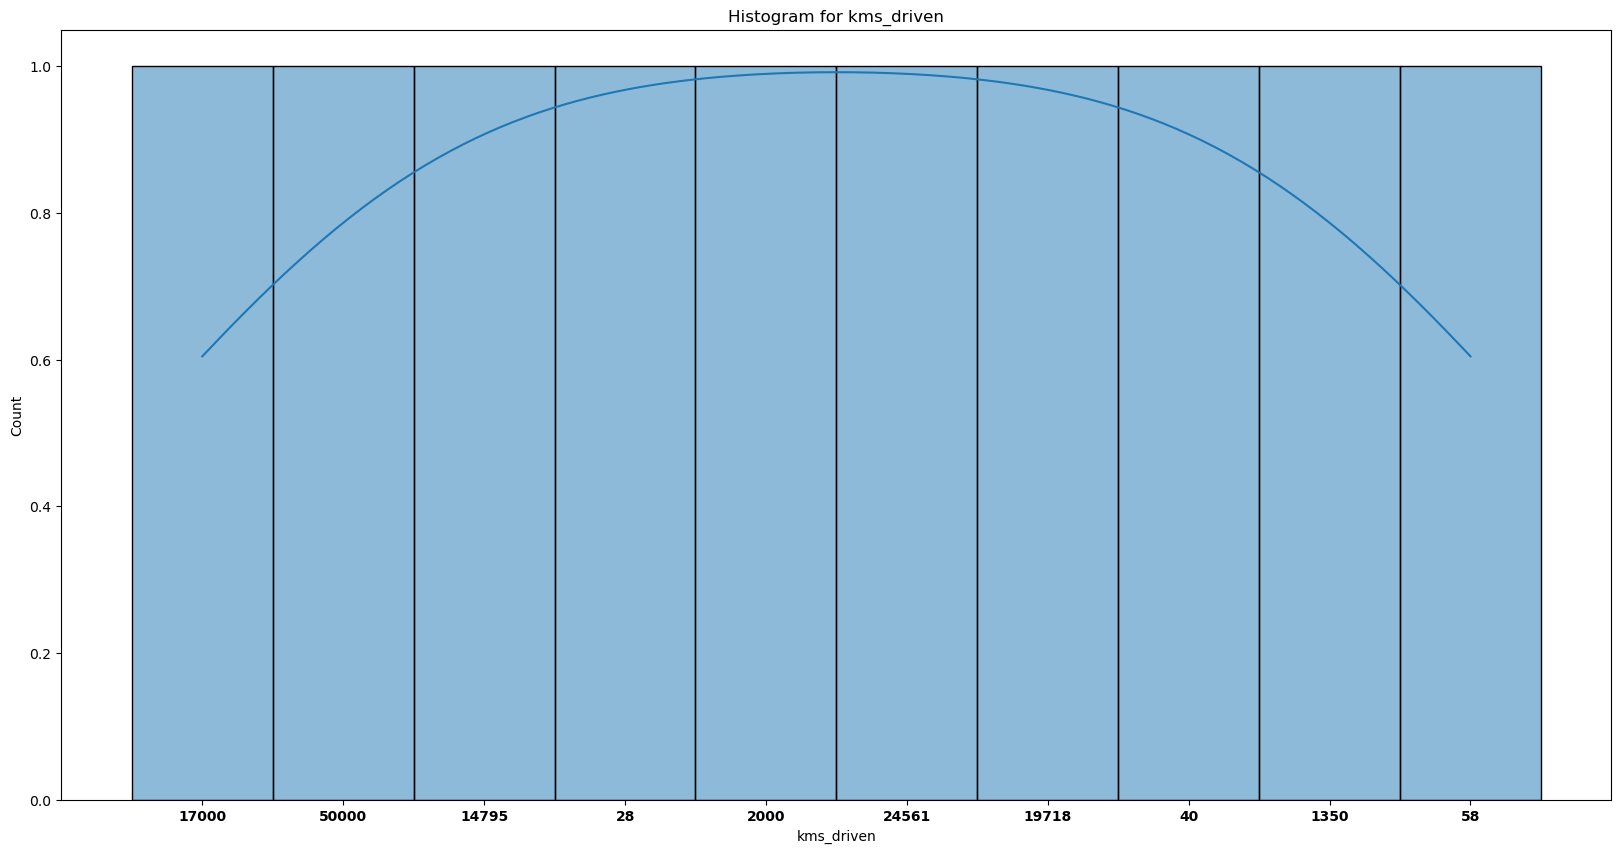

In [60]:
plt.figure(figsize=(20, 10))
plt.title('Histogram for kms_driven')
sns.histplot(Bikes_Sales_Data.head(10),x='kms_driven',bins=50,kde=True)
plt.xticks(fontweight='bold')
plt.show()

## Observation:
- Most of the used bikes available has 24,561
- It means Used Bikes which drove less is available in good count,
  which is a good thing from customers point of view

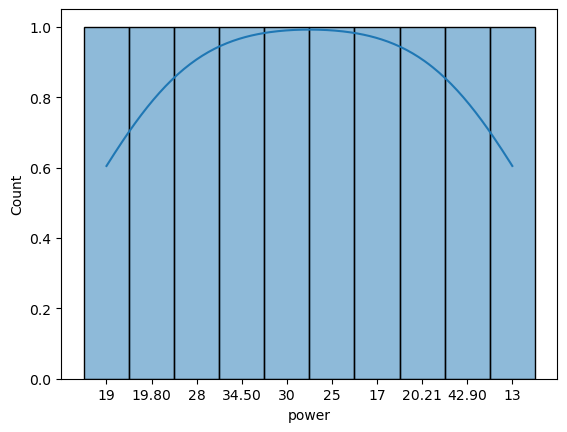

In [61]:
sns.histplot(Bikes_Sales_Data.head(10),x='power',bins=50,kde=True)
plt.show()

## Observation:
- major count is for 19.8 bhp 
- Rest all are same

### Bar Graph between model_year and Price

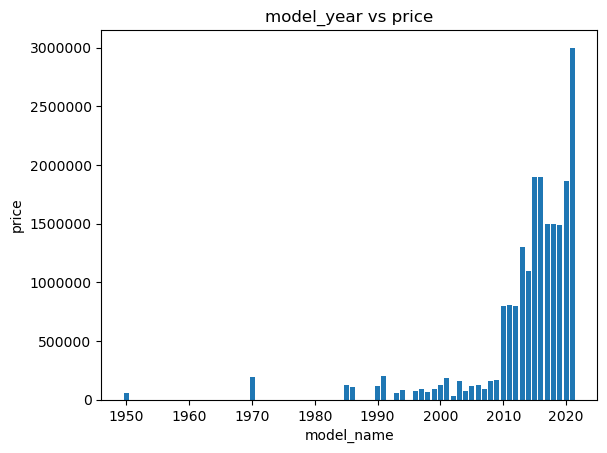

In [64]:
x=Bikes_Sales_Data['model_year']
y=Bikes_Sales_Data['price']
plt.ticklabel_format(style='plain')
plt.bar(x,y)
plt.xlabel('model_name')
plt.ylabel('price')
plt.title('model_year vs price')
plt.ticklabel_format(style='plain') # to remove le6
plt.show()

#### Observation
- **Maximum Sales came from Bikes having model_year in range 2010 to 2020**
- **Very Few were interested in bikes whose model_year is older than 1970**

In [65]:
Bikes_Sales_Data

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,\n\n,19,63500
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,\n\n,19.80,115000
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,\n\n,28,300000
3,Bajaj Dominar 400 ABS 2017,2017,28,first owner,pondicherry,\n\n,34.50,100000
4,Jawa Perak 330cc 2020,2020,2000,first owner,bangalore,\n\n,30,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000,first owner,agra,\n\n,16,55000
7853,Bajaj Discover 100cc 2015,2015,80,first owner,delhi,\n\n,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407,first owner,bangalore,\n\n,17,61740
7855,Bajaj V15 150cc 2016,2016,7524,first owner,bangalore,\n\n,11.80,49000


In [66]:
Bikes_Sales_Data['model_name'].value_counts()   # Checking count of each bikes 

model_name
Royal Enfield Classic 350cc 2017        78
Royal Enfield Classic 350cc 2016        69
Royal Enfield Classic 350cc 2015        67
Royal Enfield Thunderbird 350cc 2015    63
Royal Enfield Classic 350cc 2018        59
                                        ..
Bajaj 4S champion 100cc 1993             1
Hero Ignitor Disc 125cc 2016             1
Honda CB Shine 125cc CBS 2020            1
Kawasaki Ninja 650cc 2011                1
Hero CD Deluxe 100cc 2004                1
Name: count, Length: 1700, dtype: int64

### conclusion
- From above value,i found that model_name **Royal Enfield Classic 350cc 2017** sold the most
- **Major Revenue came from this model**

In [69]:
count=Bikes_Sales_Data['location'].value_counts()
print(count)

location
delhi           1432
mumbai           851
bangalore        776
pune             340
hyderabad        335
                ... 
tonk               1
jhabua             1
aluva              1
irinjalakuda       1
sidlaghatta        1
Name: count, Length: 558, dtype: int64


## Observation
**delhi has maximum sales among metro cities and hyderabad has least**


**Stage 4 :Model Trainer -:multiple models needs to apply to find the best One**